In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


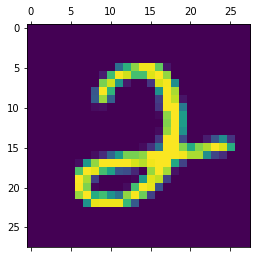

In [17]:
plt.matshow(X_train[16])

In [19]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [21]:
X_test_flattened.shape

(10000, 784)

In [23]:
#Making Input and Output Layer

model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.8672 - accuracy: 0.8399
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.0556 - accuracy: 0.8789
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6616 - accuracy: 0.8838
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6000 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3850 - accuracy: 0.8873


In [24]:
#Scaling

X_train=X_train/25
X_test=X_test/25

In [25]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [28]:
#Making Input and Output Layer after scaling

model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4958 - accuracy: 0.8695
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3684 - accuracy: 0.9029
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3547 - accuracy: 0.9104
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3415 - accuracy: 0.9121
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3392 - accuracy: 0.9125
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3328 - accuracy: 0.9152
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3316 - accuracy: 0.9151
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3253 - accuracy: 0.9151
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3218 - accuracy: 0.9156
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.324

In [29]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3678 - accuracy: 0.9113


[0.3677814304828644, 0.911300003528595]

In [31]:
#prediction

y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [38]:
y_predicted

array([[5.8421409e-07, 6.0854722e-15, 2.7874664e-06, ..., 9.9999964e-01,
        7.9261363e-02, 8.5387188e-01],
       [4.7746557e-03, 1.2349883e-02, 9.9999923e-01, ..., 1.4564908e-30,
        1.7051054e-02, 2.8355679e-26],
       [3.0187076e-07, 9.9926758e-01, 8.9261788e-01, ..., 1.9420484e-04,
        2.1331312e-01, 1.1606089e-02],
       ...,
       [2.3749525e-10, 1.8963905e-10, 1.6441703e-04, ..., 4.3126127e-01,
        8.1086057e-01, 9.7566313e-01],
       [3.6796462e-11, 4.9244203e-10, 1.0995156e-07, ..., 8.3994152e-08,
        8.1841826e-01, 3.7278278e-09],
       [5.7755261e-07, 4.6662603e-18, 9.3424726e-01, ..., 4.7687149e-22,
        2.5877585e-08, 5.8798079e-12]], dtype=float32)

In [39]:
y_predicted[5]

array([2.7994122e-07, 9.9993217e-01, 8.6688018e-01, 3.4637767e-01,
       2.8202817e-04, 3.4163403e-03, 8.0448139e-05, 9.3298525e-01,
       4.1554675e-01, 1.3078398e-01], dtype=float32)

In [37]:
np.argmax(y_predicted[5])

1

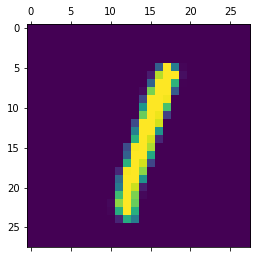

In [36]:
plt.matshow(X_test[5])

In [44]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels[0:5])
print(y_test[0:5])

[7, 2, 1, 0, 4]
[7 2 1 0 4]


In [45]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    5,    5,    0,    7,    9,    2,    2,    0],
       [   0, 1111,   10,    1,    0,    1,    3,    1,    8,    0],
       [   3,    9,  955,    9,    5,    5,   11,   12,   20,    3],
       [   3,    1,   34,  884,    0,   58,    3,   14,   10,    3],
       [   1,    2,   17,    3,  832,    3,   16,   15,   17,   76],
       [   5,    4,    8,   24,    5,  798,   14,    4,   25,    5],
       [   8,    2,   18,    3,    2,   23,  901,    1,    0,    0],
       [   0,    7,   25,    6,    1,    2,    0,  950,    4,   33],
       [   9,   15,   29,   26,    8,   47,    8,   11,  810,   11],
       [   5,    8,    3,    7,   12,   14,    0,   30,    7,  923]])>

Text(69.0, 0.5, 'Truth')

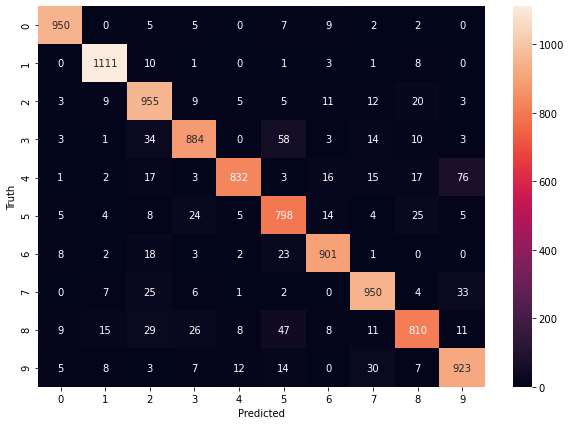

In [48]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
#Making Input and Output Layer and Hidden Layer

model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2643 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1192 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0731 - accuracy: 0.9767
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0582 - accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9851
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0401 - accuracy: 0.9868
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.9892
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

In [50]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1382 - accuracy: 0.9723


[0.1382102519273758, 0.9722999930381775]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

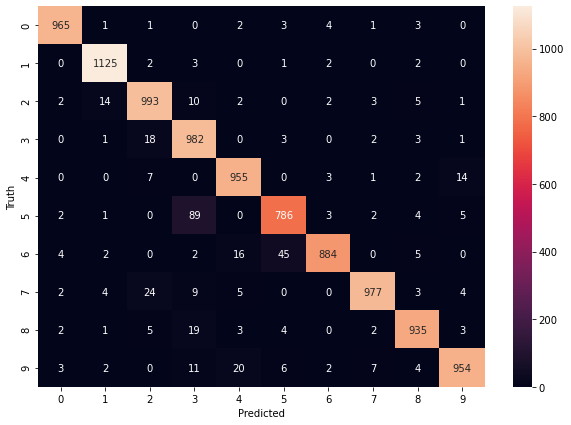

In [51]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



In [52]:
#Without pre flatteing

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2634 - accuracy: 0.9238
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1181 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0879 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0725 - accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0584 - accuracy: 0.9811
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0498 - accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0440 - accuracy: 0.9859
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0390 - accuracy: 0.9872
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0338 - accuracy: 0.9893
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.032